In [91]:
import pandas as pd
import obspy
from obspy.clients.fdsn import Client


import sys
sys.path.append('/home/ak287/seisbench/seisbench/models')
import seisbench.models as sbm
import numpy as np
import re
import pandas as pd

In [7]:
pd.read_csv('../../data/alex_curated_dataset/evids_for_akash.txt')

,60129408_output.txt:PROBS: 60129408 SeismicCNN_2d 0 0.0000814 0.9992199 0.2787472 0.8141747 420.39 [['UW.STOR..HHE','UW.STOR..HHN','UW.STOR..HHZ']]
0,60129408_output.txt:PROBS: 60129408 SeismicCNN...,'UW.RVC..EHZ','UW.RVC..EHZ']]
1,60129408_output.txt:PROBS: 60129408 SeismicCNN...,'UW.FMW..EHZ','UW.FMW..EHZ']]
2,60129408_output.txt:PROBS: 60129408 SeismicCNN...,'CC.OBSR..BHN','CC.OBSR..BHZ']]
3,60129408_output.txt:PROBS: 60129408 SeismicCNN...,'UW.RATT..BHN','UW.RATT..BHZ']]
4,60129408_output.txt:PROBS: 60129408 SeismicCNN...,'UW.RCS..EHZ','UW.RCS..EHZ']]
...,...,...,...
91109,62086336_output.txt:PROBS: 62086336 SeismicCNN...,'UW.NIKE..HHN','UW.NIKE..HHZ']]
91110,62086336_output.txt:PROBS: 62086336 SeismicCNN...,'UW.RSW..EHZ','UW.RSW..EHZ']]
91111,62086336_output.txt:PROBS: 62086336 SeismicCNN...,'UW.LMONT..HHN','UW.LMONT..HHZ']]
91112,62086336_output.txt:PROBS: 62086336 SeismicCNN...,'UW.MOX..HHN','UW.MOX..HHZ']]


In [8]:
pd.read_csv('../../data/alex_curated_dataset/evid_mapping_for_akash.txt')

ParserError: Error tokenizing data. C error: Expected 7 fields in line 3605, saw 8


In [9]:


# Read file1 and skip lines starting with "#"
file1_path = "../../data/alex_curated_dataset/evid_mapping_for_akash.txt"
data = []

with open(file1_path, 'r') as f:
    for line in f:
        if line.startswith("#") or line.strip() == "":
            continue
        parts = line.strip().split("|")
        if len(parts) >= 7:
            evid = int(parts[0].strip())
            magnitude = float(parts[1].strip())
            starttime = parts[4].strip()
            lat = float(parts[5].strip())
            lon = float(parts[6].strip())
            data.append([evid, magnitude, starttime, lat, lon])

df_meta = pd.DataFrame(data, columns=["evid", "magnitude", "starttime", "lat", "lon"])


,evid,magnitude,starttime,lat,lon
0,61504153,-0.39,2025-04-03 21:23:00.09-07,45.334667,-121.688500
1,61504148,-0.12,2025-04-03 21:22:42.07-07,45.334500,-121.689500
2,62080302,-0.16,2025-04-03 21:22:31.84-07,45.333167,-121.694667
3,61504143,-0.31,2025-04-03 21:18:37.92-07,45.331833,-121.694000
4,62080297,0.22,2025-04-03 21:18:19.799999-07,45.333500,-121.694500
...,...,...,...,...,...
11264,61342091,-5.00,2017-10-15 01:21:18.149998-07,46.827667,-121.730500
11265,61317147,-5.00,2017-10-11 17:21:17.939999-07,46.194333,-122.198500
11266,61316952,-5.00,2017-10-11 03:53:56.679998-07,46.851500,-121.791167
11267,61316807,-5.00,2017-10-10 19:10:42.089999-07,46.854167,-121.731167


In [70]:


file2_path = "../../data/alex_curated_dataset/evids_for_akash.txt"
event_id = "60142308"
stations = []
distances = []

with open(file2_path, 'r') as f:
    for line in f:
        if line.startswith(event_id) and 'PROBS:' in line:
            # Extract station triplet using regex
            match = re.search(r"\[\[(.*?)\]\]", line)
            if match:
                # Get station list
                chans = match.group(1).replace("'", "").split(", ")
                stations.append([chan.strip() for chan in chans])
                
                # Extract the number just before the station list (the distance)
                pre_text = line[:match.start()]  # text before the [[...]]
                nums = re.findall(r"[-+]?\d*\.\d+|\d+", pre_text)  # find all numbers
                if nums:
                    dist = float(nums[-1])  # last number before the stations
                    distances.append(dist)


In [71]:
distances

[16.28, 0.84, 119.34, 1.59, 1.54]

In [72]:
stations

[['CC.SEP..EHE', 'CC.SEP..EHN', 'CC.SEP..EHZ'],
 ['CC.STD..BHE', 'CC.STD..BHN', 'CC.STD..BHZ'],
 ['CC.SUG..EHE', 'CC.SUG..EHN', 'CC.SUG..EHZ'],
 ['CC.SWF2..BHE', 'CC.SWF2..BHN', 'CC.SWF2..BHZ'],
 ['UW.HSR..EHZ', 'UW.HSR..EHZ', 'UW.HSR..EHZ']]

In [25]:
temp_df = df_meta[df_meta['evid'] == 60142308]

In [75]:
starttime = temp_df['starttime'].values[0]

st_time = obspy.UTCDateTime(starttime)+distances[0]/6



In [74]:
stations[1]

['CC.STD..BHE', 'CC.STD..BHN', 'CC.STD..BHZ']

In [45]:
net = stations[0][0].split('.')[0]
sta = stations[0][0].split('.')[1]
chn = stations[0][0].split('.')[3][:2]
client = Client('IRIS')

In [76]:
st = client.get_waveforms(network = net, 
                     station = sta, 
                     channel = chn+'*', 
                     location = '*',
                     starttime = st_time-200, 
                     endtime = st_time + 400 ,
                     
                    )






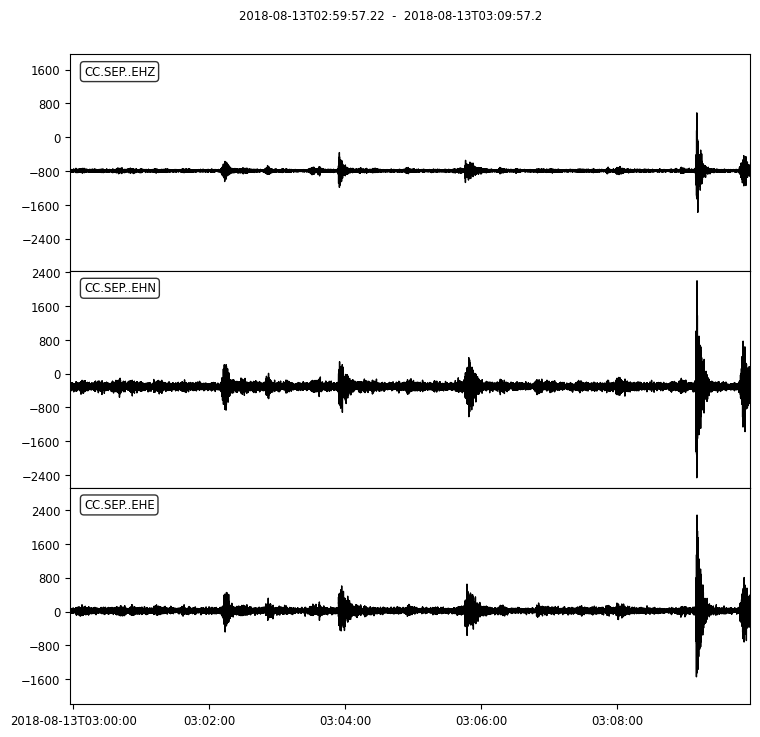

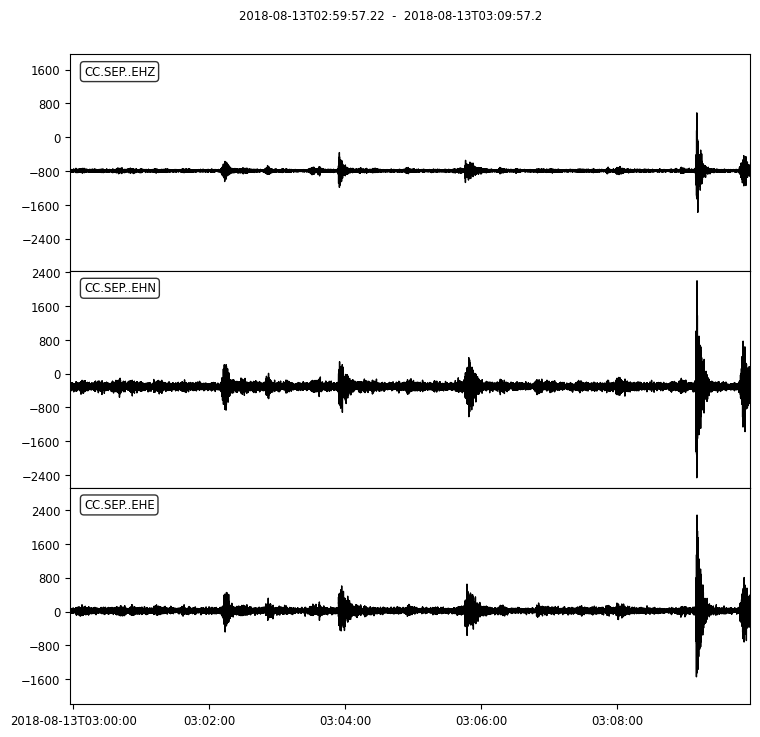

In [77]:
st.plot()

In [63]:
## Loading the quakexnet model. 


model3_sc = sbm.QuakeXNet.from_pretrained("base", version_str = '3')
model3_qx = sbm.QuakeXNet.from_pretrained("base", version_str = '3')

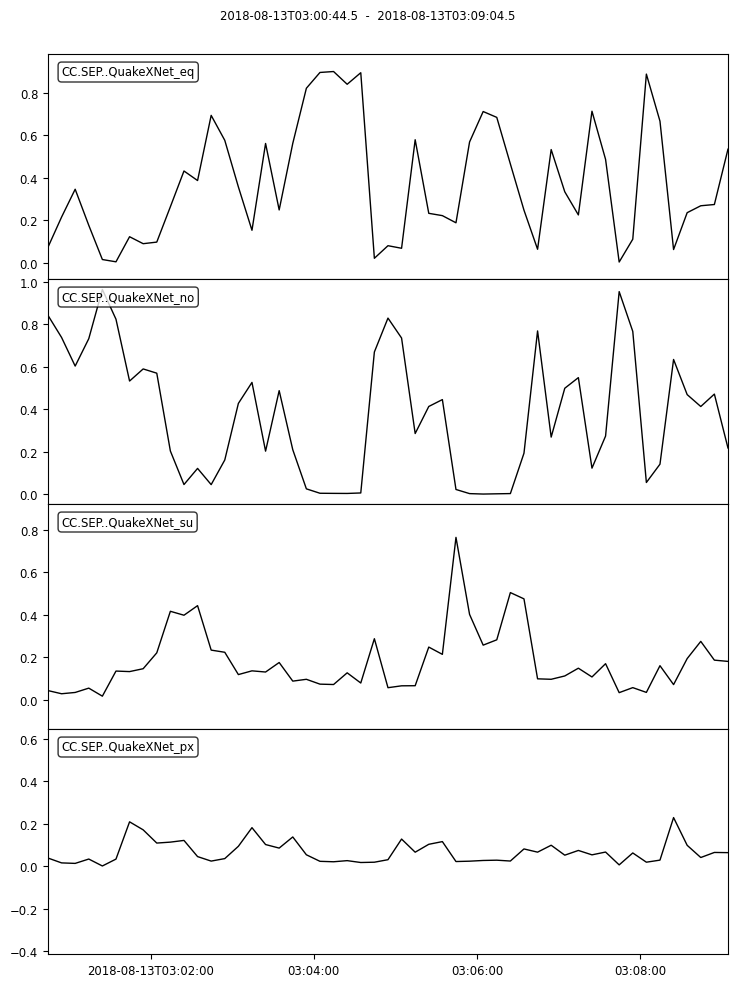

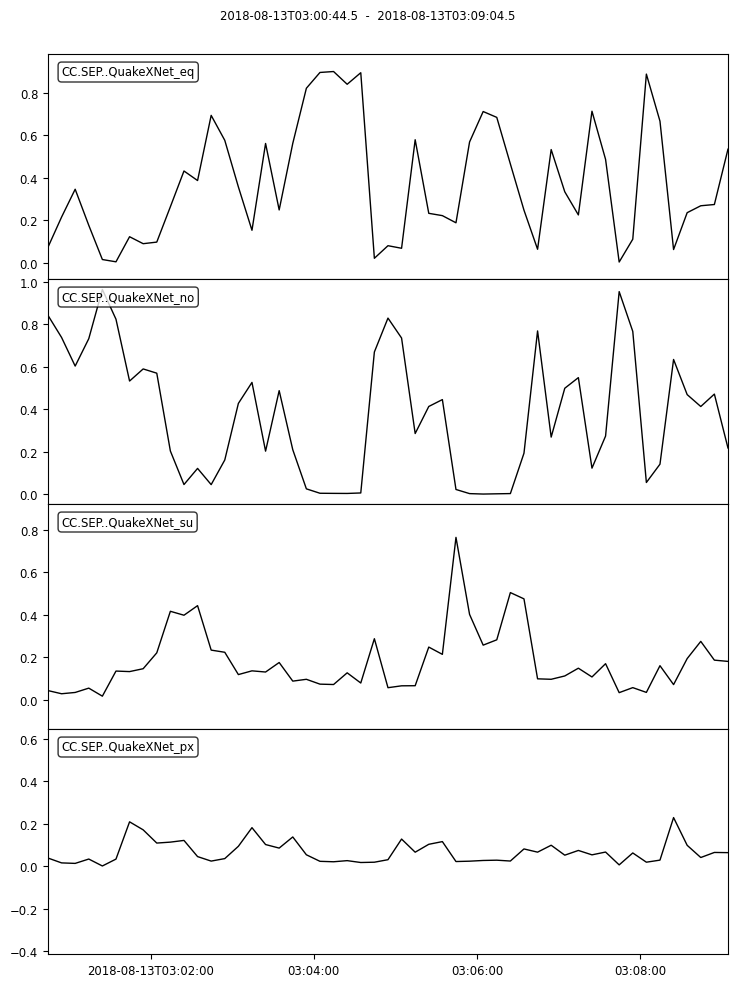

In [64]:
 model3_sc.annotate(st, stride = 500).plot()

In [78]:
# we want to smoothen out the probabilities here. 
def smooth_moving_avg(x, window=5):
    pad_width = window // 2
    padded = np.pad(x, (pad_width, pad_width), mode='edge')
    kernel = np.ones(window) / window
    return np.convolve(padded, kernel, mode='valid')






def detect_event_windows(prob_series, enter_thr=0.15, exit_thr=0.15, peak_thr=0.5):
    in_event = False
    events = []
    start = None
    max_val = -np.inf
    running_vals = []

    for i, val in enumerate(prob_series):
        if not in_event and val >= enter_thr:
            start = i
            max_val = val
            running_vals = [val]
            in_event = True
        elif in_event:
            running_vals.append(val)
            max_val = max(max_val, val)
            if val < exit_thr:
                end = i
                if max_val >= peak_thr:
                    mean_val = np.mean(running_vals)
                    auc = np.trapz(running_vals)  # Area under the curve
                    events.append({
                        "start": start,
                        "end": end,
                        "max_prob": max_val,
                        "mean_prob": mean_val,
                        "area_under_curve": auc
                    })
                in_event = False

    # Handle if still in event at end of series
    if in_event and max_val >= peak_thr:
        mean_val = np.mean(running_vals)
        auc = np.trapz(running_vals)
        events.append({
            "start": start,
            "end": len(prob_series) - 1,
            "max_prob": max_val,
            "mean_prob": mean_val,
            "area_under_curve": auc
        })

    return events



In [79]:
probs_st = model3_qx.annotate(st, stride = 500)

In [80]:
probs_st

4 Trace(s) in Stream:
CC.SEP..QuakeXNet_eq | 2018-08-13T03:00:47.220000Z - 2018-08-13T03:09:07.220000Z | 0.1 Hz, 51 samples
CC.SEP..QuakeXNet_px | 2018-08-13T03:00:47.220000Z - 2018-08-13T03:09:07.220000Z | 0.1 Hz, 51 samples
CC.SEP..QuakeXNet_no | 2018-08-13T03:00:47.220000Z - 2018-08-13T03:09:07.220000Z | 0.1 Hz, 51 samples
CC.SEP..QuakeXNet_su | 2018-08-13T03:00:47.220000Z - 2018-08-13T03:09:07.220000Z | 0.1 Hz, 51 samples

In [81]:
chn_prefix = 'QuakeXNet_'

In [86]:
evt_id = 60142308
results = []
# Collect stats
total_auc = {}
mean_probs = {}
max_probs = {}


class_names = ['eq', 'px', 'su']
channel_map = {
            'eq': f'{chn_prefix}eq',
            'px': f'{chn_prefix}px',
            'su': f'{chn_prefix}su'
        }

for cls in class_names:
    total_auc[cls] = 0.0
    mean_probs[cls] = []
    max_probs[cls] = []

    probs = probs_st.select(channel=channel_map[cls])

    for prob in probs:
        probs_array = np.array(prob)
        s_cls = smooth_moving_avg(probs_array)
        events = detect_event_windows(s_cls)

        for event in events:
            total_auc[cls] += event['area_under_curve']
            mean_probs[cls].append(event['mean_prob'])
            max_probs[cls].append(event['max_prob'])


# Final label by max of max_probs
max_probs_final = {cls: max(max_probs[cls]) if max_probs[cls] else 0 for cls in class_names}
final_label = max(max_probs_final, key=max_probs_final.get)

# Summarize statistics
stats = {
    'evt_id': evt_id,
    'network': net,
    'station': sta,
    'label': final_label,
}

for cls in class_names:
    stats[f'{cls}_auc'] = total_auc[cls]
    stats[f'{cls}_mean'] = np.mean(mean_probs[cls]) if mean_probs[cls] else 0
    stats[f'{cls}_max'] = np.max(max_probs[cls]) if max_probs[cls] else 0

# Append result
results.append(stats)



In [87]:
results

[{'evt_id': 60142308,
  'network': 'CC',
  'station': 'SEP',
  'label': 'eq',
  'eq_auc': 19.105461326614023,
  'eq_mean': 0.45299881646452955,
  'eq_max': 0.8634348750114442,
  'px_auc': 0.0,
  'px_mean': 0,
  'px_max': 0,
  'su_auc': 0.0,
  'su_mean': 0,
  'su_max': 0}]

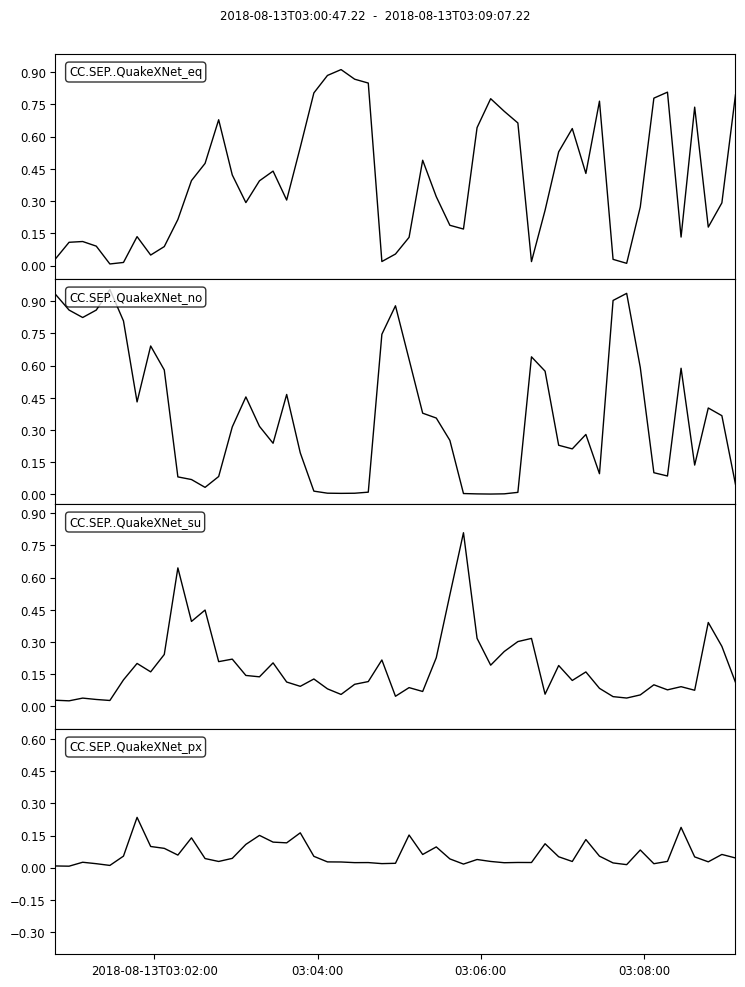

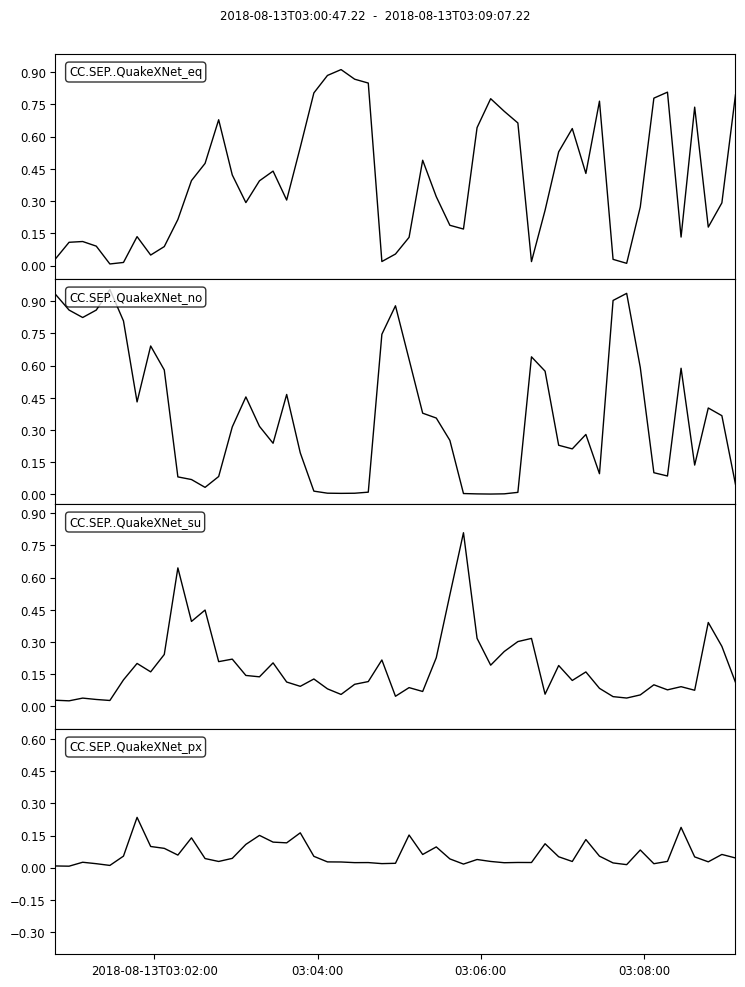

In [88]:
probs_st.plot()